# A4: Project EDA

In [101]:
from IPython.display import display, HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('div.output_wrapper').hide();
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [104]:
# Set up
import numpy as np
from __future__ import division # division
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats.stats import pearsonr # correlation
import matplotlib.pyplot as plt # plotting
import matplotlib
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline

# Load the data
df = pd.read_csv('Youth_Tobacco_Survey__YTS__Data.csv')

# Data Structure

The Youth Tobacco Survey collects data from students in grades 6 through 12 between 1999 - 2015. Individual State Departments of Health plan and implement the survey with assistance from the Centers for Disease Control and Prevention staff in the Office of Smoking and Health.

The YTS measures the following components:

- Knowledge and attitudes regarding tobacco use
- Exposure to media and advertising
- Information on the enforcement of minors' access regulations and laws
- Presence of tobacco programs in school curricula
- Cessation attempts and successes
- Second hand smoke exposure
- Prevalence of other tobacco products (i.e., pipe use, bidis, kreteks, and snus)

There are 9,794 rows with 31 columns in the raw dataset. Key column headings include:
- Year
- LocationAbbr (State abbreviation)
- TopicDesc (Stage/type of tobacco use)
- MeasureDesc (What is being measured)
- Data_Value (result as a percentage)
- Sample_Size
- Gender
- Education 
- GeoLocation

Rows with NA values in the Data_Value column were dropped to create a subset of 9,369 rows.

In [105]:
df.shape

(9794, 31)

In [106]:
df.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [107]:
df.dtypes

YEAR                            int64
LocationAbbr                   object
LocationDesc                   object
TopicType                      object
TopicDesc                      object
MeasureDesc                    object
DataSource                     object
Response                       object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Data_Value_Std_Err            float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Gender                         object
Race                           object
Age                            object
Education                      object
GeoLocation                    object
TopicTypeId                    object
TopicId                        object
MeasureId                      object
StratificationID1              object
Stratificati

In [108]:
df = df[np.isfinite(df['Data_Value'])]

In [109]:
display(df)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
6,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS07,7
7,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS07,7
8,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7
9,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
10,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS08,8
11,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS08,8
12,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS09,9
13,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS09,9
14,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS09,9
15,2015,AZ,Arizona,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Current,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS10,10


In [110]:
df.shape

(9369, 31)

# Univariate Analysis

Some values in Data_Value are missing because of a small sample size. For our analysis, we have removed these data points. There are also a few values in _Response_ that are also missing and these are because either the data has been suppressed due to small sample size or because this value is already described in MeasureDesc (e.g. "Percent of Current Smokers Who Want to Quit"). Therefore, any case of NA in this column left in the adjusted dataset will be considered as analogous to "Current".

### Distribution of our data values

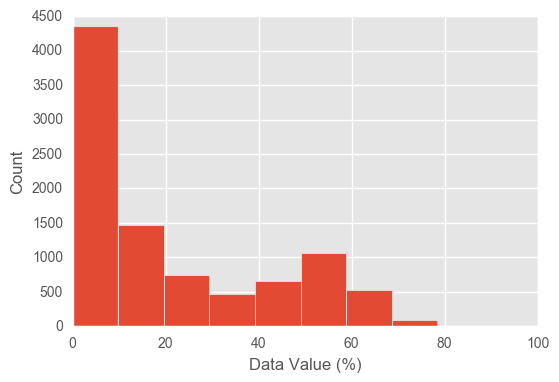

In [113]:
plt.hist(df['Data_Value'])
plt.xlabel("Data Value (%)")
plt.ylabel("Count")
plt.show()

### Basic summary statistics of our data values

In [23]:
print(df['Data_Value'].describe())

count    9369.000000
mean       20.967830
std        21.299902
min         0.000000
25%         3.200000
50%        11.300000
75%        39.100000
max        98.000000
Name: Data_Value, dtype: float64


### Distribution of data points per year

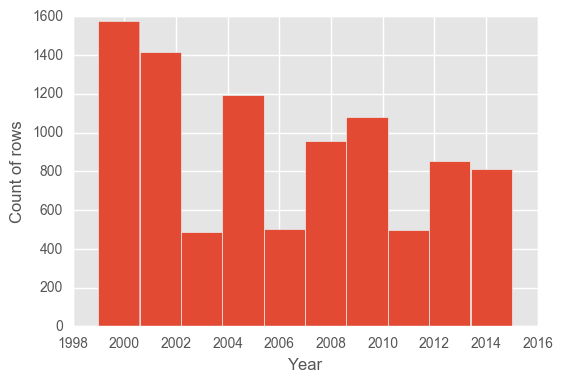

In [114]:
plt.hist(df['YEAR'])
plt.xlabel("Year")
plt.ylabel("Count of rows")
plt.show()

# Univariate Analysis by Category

In [45]:
curcig = df[df['TopicDesc']=='Cigarette Use (Youth)']
curcig = curcig[curcig['Response']=='Current']
curcig

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
6,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS07,7
7,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS07,7
8,2015,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.865970280000454, -111.76381127699972)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7
36,2015,CT,Connecticut,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(41.56266102000046, -72.64984095199964)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS07,7
37,2015,CT,Connecticut,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(41.56266102000046, -72.64984095199964)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,2EDU,YTS07,7
38,2015,CT,Connecticut,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(41.56266102000046, -72.64984095199964)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,1EDU,YTS07,7
39,2015,CT,Connecticut,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(41.56266102000046, -72.64984095199964)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,2EDU,YTS07,7
40,2015,CT,Connecticut,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(41.56266102000046, -72.64984095199964)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7
41,2015,CT,Connecticut,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(41.56266102000046, -72.64984095199964)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS07,7
78,2015,GA,Georgia,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(32.83968109300048, -83.62758034599966)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,2EDU,YTS07,7


In [57]:
avgcurcig = curcig.groupby('Gender').mean().reset_index()
avgcurcig

,Gender,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
0,Female,2006.315036,12.997375,1.482578,10.091885,15.899523,1374.556086,7.0
1,Male,2006.315036,14.036754,1.481384,11.132936,16.944869,1330.379475,7.0
2,Overall,2006.315036,13.565871,1.216229,11.185680,15.945346,2715.498807,7.0


### Average Current Cigarette Users by Gender

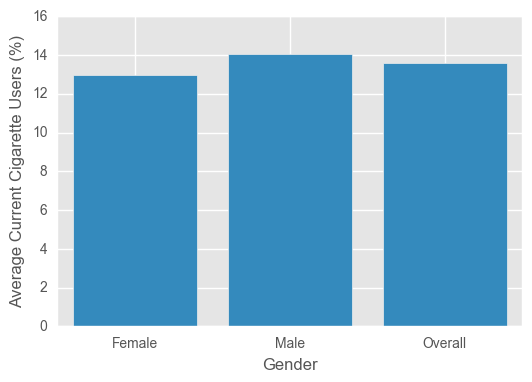

In [64]:
x = np.array([0,1,2])
plt.bar(x, avgcurcig['Data_Value'], align='center')
plt.xticks(x, avgcurcig.Gender)
plt.xlabel("Gender")
plt.ylabel("Average Current Cigarette Users (%)")
plt.show()

### Average Current Cigarette Users by Gender for each year

In [74]:
curcigF = curcig[curcig['Gender']=='Female'].groupby('YEAR').mean().reset_index()
curcigM = curcig[curcig['Gender']=='Male'].groupby('YEAR').mean().reset_index()
curcigF

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
0,1999,19.906667,1.900000,16.173333,23.640000,1538.066667,7
1,2000,19.676471,1.888235,15.978431,23.358824,1637.823529,7
2,2001,15.361111,1.527778,12.355556,18.372222,1935.555556,7
3,2002,16.402326,1.565116,13.341860,19.472093,2516.906977,7
4,2003,12.838095,1.390476,10.109524,15.580952,2244.571429,7
5,2004,13.796154,1.576923,10.703846,16.873077,1133.115385,7
6,2005,13.946429,1.625000,10.750000,17.132143,947.178571,7
7,2006,13.422727,1.577273,10.336364,16.509091,1103.500000,7
8,2007,12.186364,1.440909,9.372727,15.000000,995.227273,7
9,2008,11.236364,1.368182,8.545455,13.927273,1057.545455,7


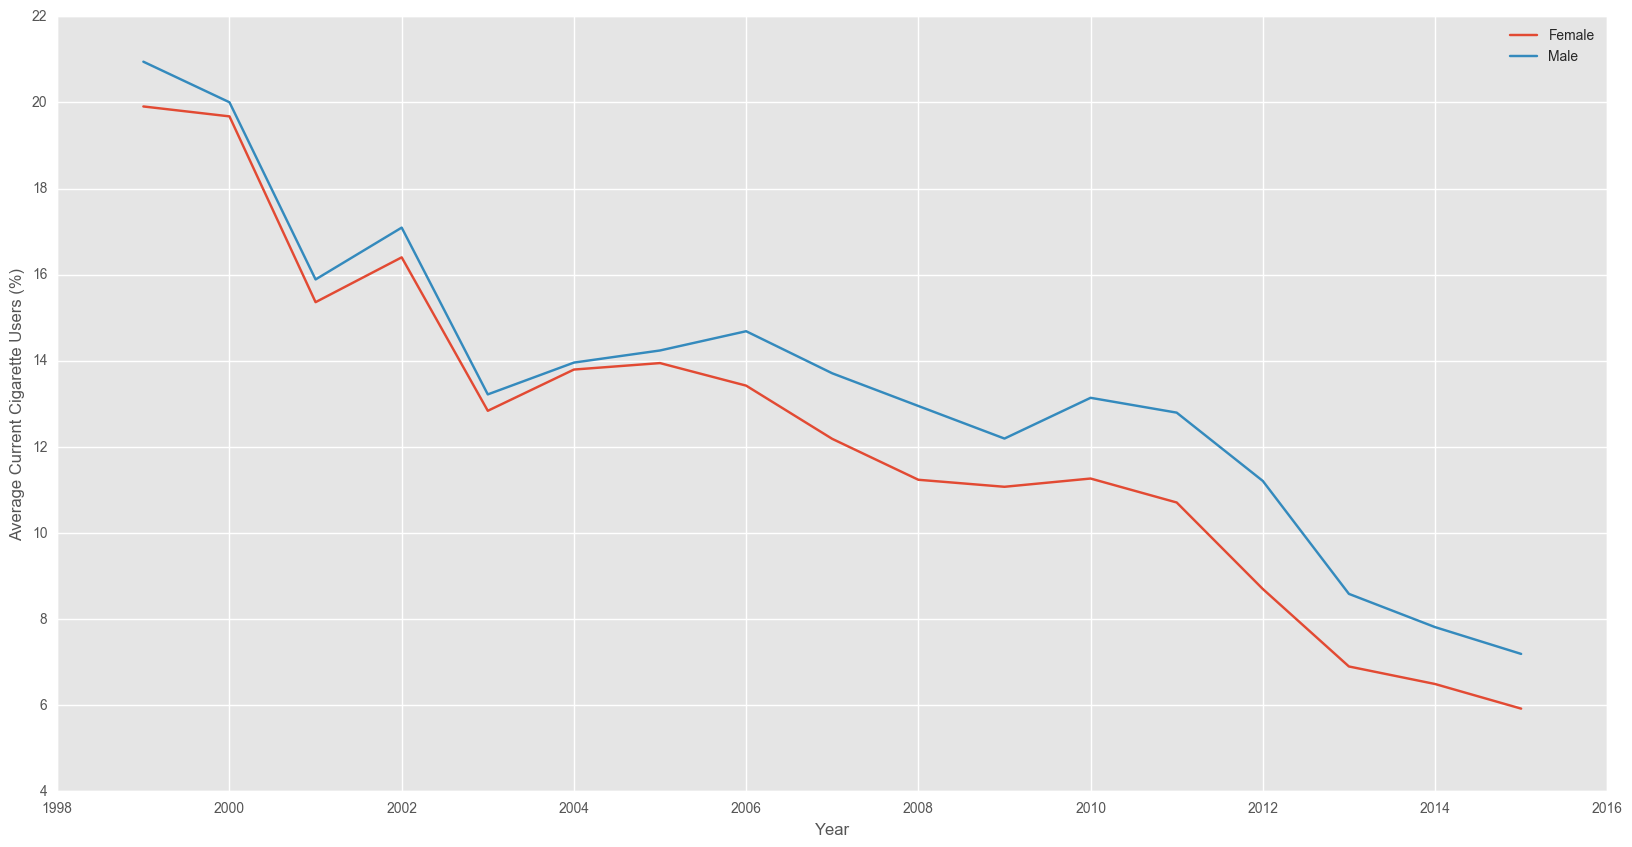

In [99]:
plt.figure(figsize=(20,10))
plt.plot(curcigF.YEAR, curcigF['Data_Value'], label='Female')
plt.plot(curcigM.YEAR, curcigM['Data_Value'], label='Male')
plt.xlabel("Year")
plt.ylabel("Average Current Cigarette Users (%)")
plt.legend(loc='upper right')
plt.show()

### Average Current Cigarette Users by Education level

In [65]:
educurcig = curcig.groupby('Education').mean().reset_index()
educurcig

,Education,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
0,High School,2006.532995,20.235702,1.753469,16.794585,23.677665,1788.147208,7.0
1,Middle School,2006.121622,7.585736,1.073874,5.487087,9.683784,1823.373874,7.0


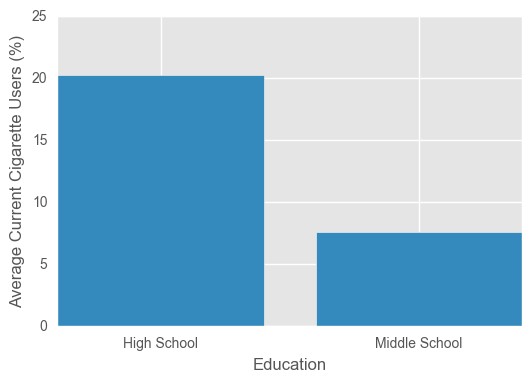

In [66]:
x = np.array([0,1])
plt.bar(x, educurcig['Data_Value'], align='center')
plt.xticks(x, educurcig.Education)
plt.xlabel("Education")
plt.ylabel("Average Current Cigarette Users (%)")
plt.show()

### Average Current Cigarette Users by Education per year

In [81]:
curcigHS = curcig[curcig['Education']=='High School'].groupby('YEAR').mean().reset_index()
curcigMS = curcig[curcig['Education']=='Middle School'].groupby('YEAR').mean().reset_index()
curcigHS

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
0,1999,32.173333,1.833333,28.553333,35.793333,2354.266667,7
1,2000,28.101389,2.033333,24.116667,32.080556,2383.763889,7
2,2001,24.823810,1.657143,21.566667,28.076190,2407.238095,7
3,2002,25.070000,1.768333,21.606667,28.540000,3250.466667,7
4,2003,20.677778,1.548148,17.625926,23.729630,2908.296296,7
5,2004,20.577778,1.833333,16.988889,24.166667,1324.916667,7
6,2005,20.957143,1.966667,17.102381,24.814286,1236.214286,7
7,2006,20.815152,1.996970,16.878788,24.751515,1445.909091,7
8,2007,19.284848,1.627273,16.087879,22.481818,1332.606061,7
9,2008,19.553333,1.856667,15.906667,23.200000,1371.866667,7


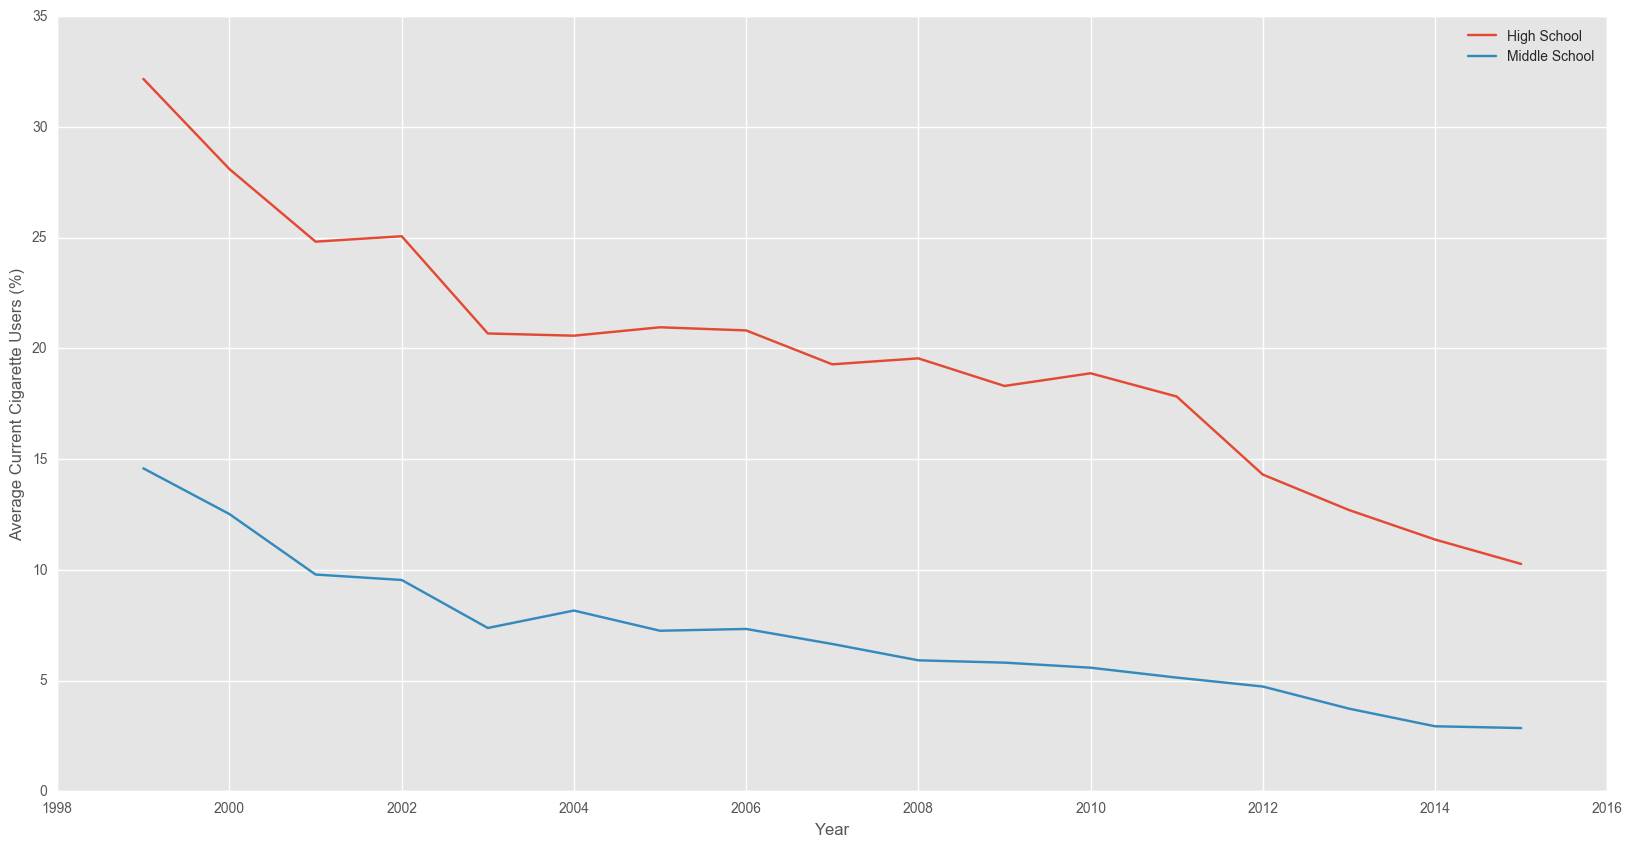

In [98]:
plt.figure(figsize=(20,10))
plt.plot(curcigHS.YEAR, curcigHS['Data_Value'], label='High School')
plt.plot(curcigMS.YEAR, curcigMS['Data_Value'], label='Middle School')
plt.xlabel("Year")
plt.ylabel("Average Current Cigarette Users (%)")
plt.legend(loc='upper right')
plt.show()

# Bivariate Analysis

### Average Current Cigarette Users by gender and education (High School) per year

In [88]:
curcigFHS = curcig[curcig['Gender']=='Female']
curcigFHS = curcigFHS[curcigFHS['Education']=='High School'].groupby('YEAR').mean().reset_index()
curcigMHS = curcig[curcig['Gender']=='Male']
curcigMHS = curcigMHS[curcigMHS['Education']=='High School'].groupby('YEAR').mean().reset_index()
curcigFHS

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
0,1999,31.920000,2.220000,27.560000,36.280000,1790.200000,7
1,2000,27.954167,2.287500,23.475000,32.437500,1835.916667,7
2,2001,24.471429,1.985714,20.571429,28.357143,1831.428571,7
3,2002,24.195000,1.895000,20.480000,27.905000,2524.750000,7
4,2003,20.000000,1.577778,16.866667,23.166667,2285.222222,7
5,2004,20.408333,1.908333,16.675000,24.141667,1020.333333,7
6,2005,20.607143,2.042857,16.614286,24.600000,947.714286,7
7,2006,19.972727,2.018182,16.000000,23.945455,1106.090909,7
8,2007,17.445455,1.654545,14.190909,20.700000,1013.636364,7
9,2008,18.250000,1.830000,14.640000,21.860000,1029.800000,7


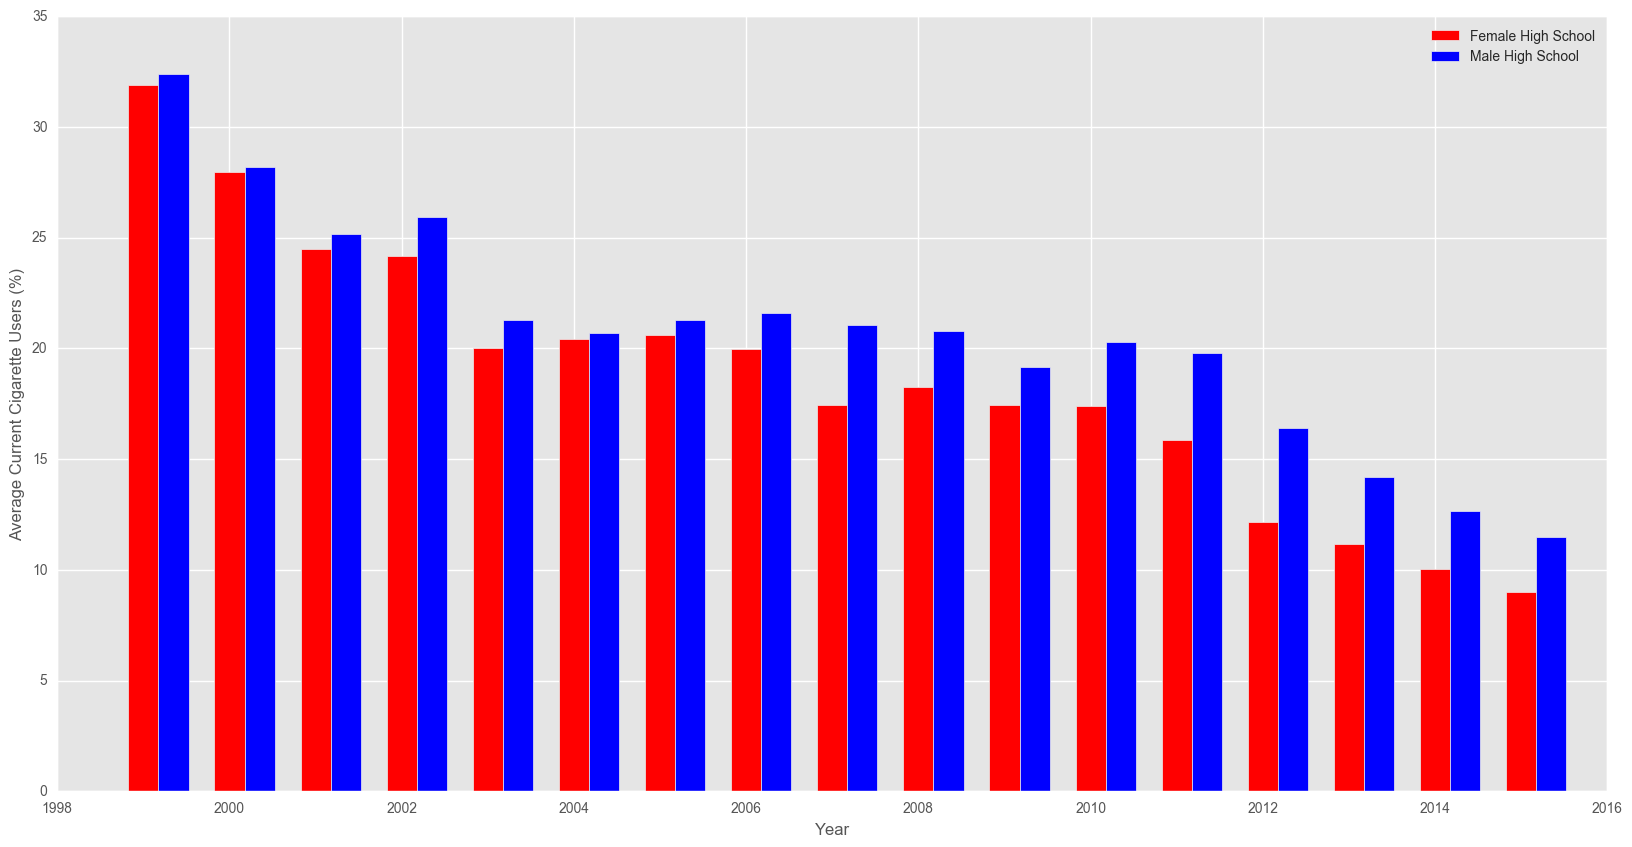

In [115]:
plt.figure(figsize=(20,10))
plt.bar(curcigFHS.YEAR, curcigFHS['Data_Value'], label='Female High School',
        color='red', align='center', width=0.35)
plt.bar(curcigMHS.YEAR + 0.35, curcigMHS['Data_Value'], label='Male High School',
        color='blue', align='center', width=0.35)
plt.xlabel("Year")
plt.ylabel("Average Current Cigarette Users (%)")
plt.legend(loc='upper right')
plt.show()

### Average Current Cigarette Users by gender and education (Middle School) per year

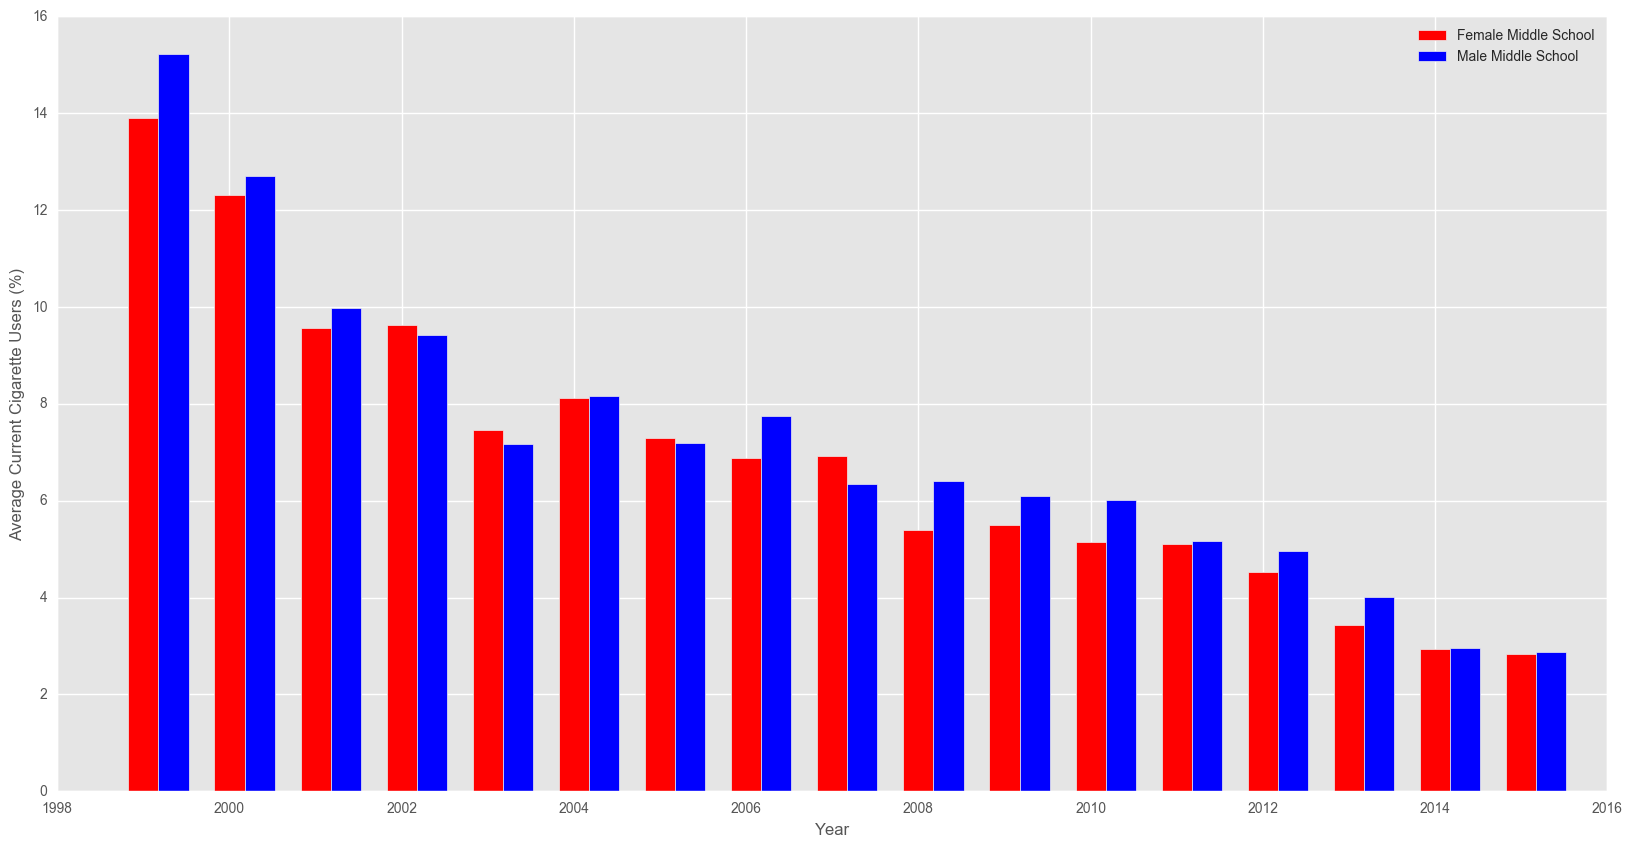

In [117]:
curcigFMS = curcig[curcig['Gender']=='Female']
curcigFMS = curcigFMS[curcigFMS['Education']=='Middle School'].groupby('YEAR').mean().reset_index()
curcigMMS = curcig[curcig['Gender']=='Male']
curcigMMS = curcigMMS[curcigMMS['Education']=='Middle School'].groupby('YEAR').mean().reset_index()

plt.figure(figsize=(20,10))
plt.bar(curcigFMS.YEAR, curcigFMS['Data_Value'], label='Female Middle School',
        color='red', align='center', width=0.35)
plt.bar(curcigMMS.YEAR + 0.35, curcigMMS['Data_Value'], label='Male Middle School',
        color='blue', align='center', width=0.35)
plt.xlabel("Year")
plt.ylabel("Average Current Cigarette Users (%)")
plt.legend(loc='upper right')
plt.show()

# Summary of Insights
There's an overall decrease in Average Current Cigarette Users over time. It is interesting to note that in some years, there is a greater or lesser difference between the two genders. There is also some variation depending on education level. 